In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
symbol = 'IUSA.L'
start_date = '2015-01-01'
end_date = '2024-02-28'

In [3]:
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,1330.00,1341.125000,1326.000000,1331.50,1331.50,702085
2015-01-05,1335.25,1343.397949,1319.447998,1326.50,1326.50,615773
2015-01-06,1326.25,1333.000000,1319.000000,1319.00,1319.00,887488
2015-01-07,1321.50,1338.750000,1320.250000,1333.75,1333.75,1394343
2015-01-08,1348.75,1361.750000,1348.692017,1357.25,1357.25,780264


In [9]:
data['MA_200'] = data['Close'].rolling(window=200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

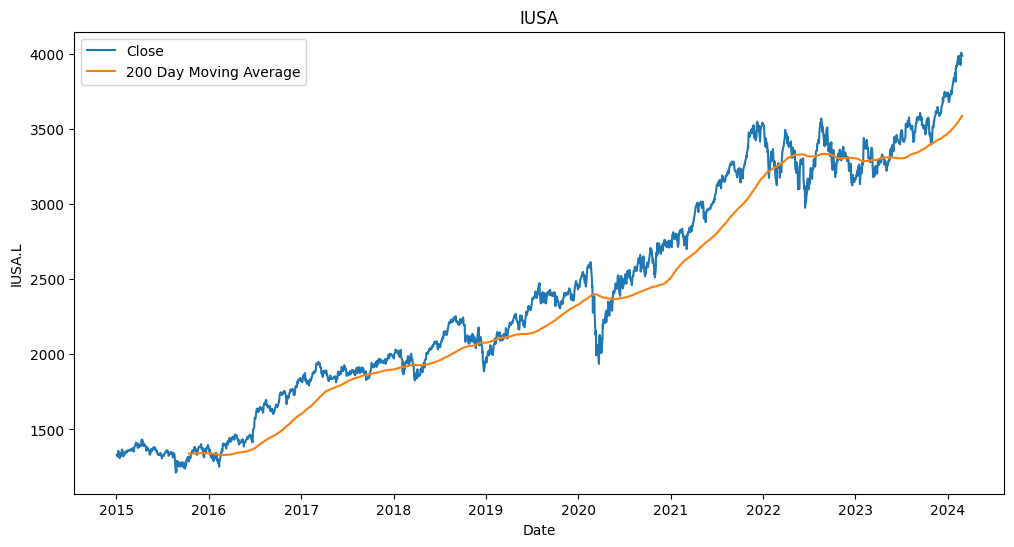

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA_200'], label='200 Day Moving Average')
plt.xlabel('Date'), plt.ylabel('IUSA.L')
plt.title('IUSA')
plt.legend()
plt.show

In [12]:
data['signal'] = np.where(data['Close'] > data['MA_200'], 1, 0)

In [14]:
data['daily_return'] = data['Close'].pct_change()
data['strategy_return'] = data['daily_return'] * data['signal'].shift(1)
data['cumulative_return'] = (1 + data['strategy_return']).cumprod()
data['benchmark_return'] = (1 + data['daily_return']).cumprod()

<function matplotlib.pyplot.show(close=None, block=None)>

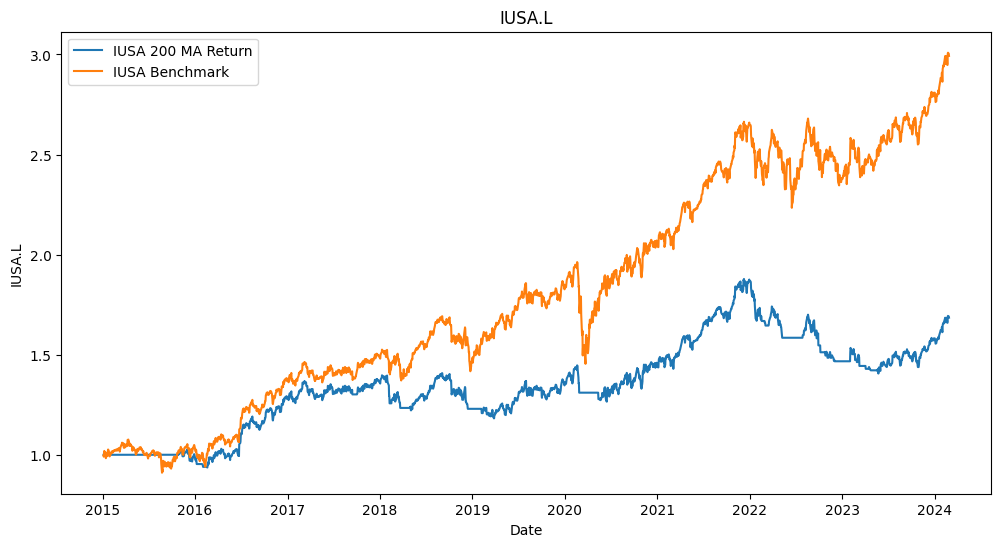

In [15]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['cumulative_return'], label='IUSA 200 MA Return')
plt.plot(data.index, data['benchmark_return'], label='IUSA Benchmark')
plt.xlabel('Date'), plt.ylabel(symbol)
plt.title(symbol)
plt.legend()
plt.show